In [66]:
import pandas as pd

# Cargar el archivo de Excel
file_path = 'datasets/Depurados/Contaminación/NYC_CO2_Emissions_Inventory.xlsx'
df = pd.read_excel(file_path)

# Filtrar las filas del sector de transporte
df_transportation = df[df['sectors_sector'].str.contains('Transportation', case=False, na=False)]

# Seleccionar solo las columnas necesarias
df_transportation = df_transportation[['year', 'category_full', 'emission_tco2e']]
print(df_transportation.head())


    year      category_full  emission_tco2e
34  2010           Railways       758079.20
35  2010           Railways        13824.05
36  2010           Railways            0.00
37  2010  Marine Navigation        51541.69
38  2010  Marine Navigation            0.00


In [67]:
df_transportation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, 34 to 714
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            221 non-null    int64  
 1   category_full   221 non-null    object 
 2   emission_tco2e  221 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.9+ KB


In [68]:
# Verificar los valores únicos en la columna 'category_full'
print(df_transportation['category_full'].unique())

# Renombrar las columnas para que Prophet las entienda
df_transportation = df_transportation.rename(columns={'year': 'ds', 'emission_tco2e': 'y'})

# Convertir la columna de año a formato de fecha
df_transportation['ds'] = pd.to_datetime(df_transportation['ds'], format='%Y')

# Verificar el DataFrame preparado
print(df_transportation.head())


['Railways' 'Marine Navigation' 'Aviation' 'On-Road']
           ds      category_full          y
34 2010-01-01           Railways  758079.20
35 2010-01-01           Railways   13824.05
36 2010-01-01           Railways       0.00
37 2010-01-01  Marine Navigation   51541.69
38 2010-01-01  Marine Navigation       0.00


11:18:14 - cmdstanpy - INFO - Chain [1] start processing
11:18:14 - cmdstanpy - INFO - Chain [1] done processing


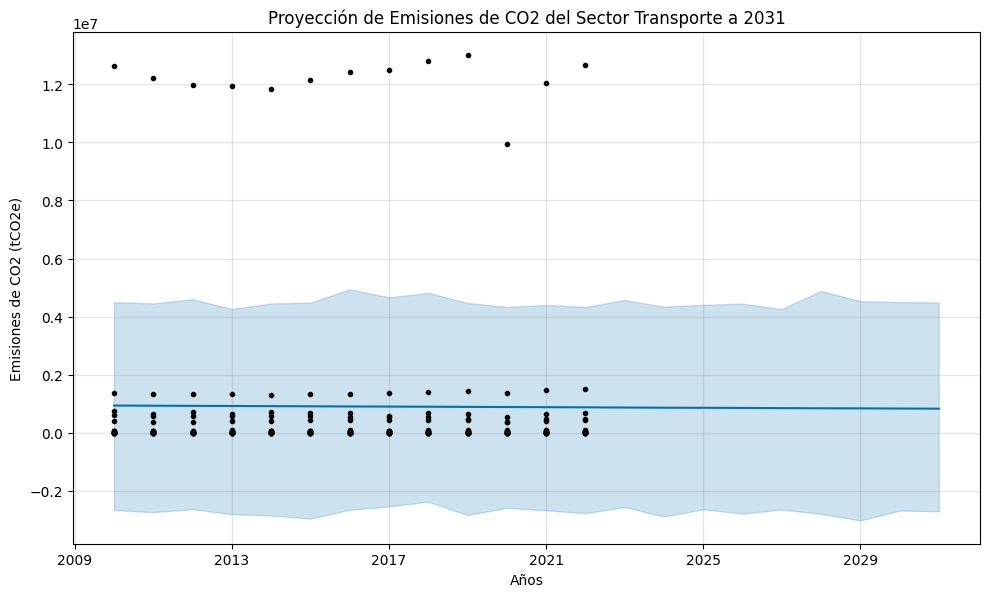

In [71]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Crear y entrenar el modelo Prophet
model = Prophet()
model.fit(df_transportation)

# Crear un dataframe con las fechas futuras para la predicción
future_dates = model.make_future_dataframe(periods=9, freq='YE')  # 9 años adicionales hasta 2031
forecast = model.predict(future_dates)

# Visualizar la predicción
fig = model.plot(forecast)
plt.xlabel('Años')
plt.ylabel('Emisiones de CO2 (tCO2e)')
plt.title('Proyección de Emisiones de CO2 del Sector Transporte a 2031')
plt.show()


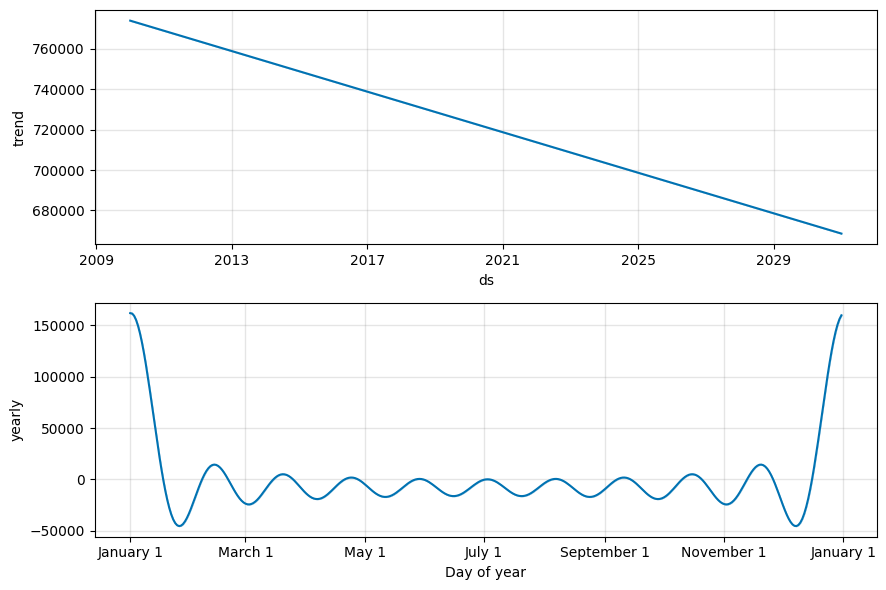

In [70]:
# Evaluar el modelo
fig2 = model.plot_components(forecast)
plt.show()


In [72]:
# Filtrar por categoría específica, por ejemplo, 'On-Road'
df_on_road = df_transportation[df_transportation['category_full'].str.contains('On-Road', case=False, na=False)]

# Verificar el DataFrame filtrado
print(df_on_road.head())


           ds category_full            y
44 2010-01-01       On-Road  12619175.98
45 2010-01-01       On-Road    392316.69
46 2010-01-01       On-Road   1353434.07
47 2010-01-01       On-Road     66544.43
48 2010-01-01       On-Road     57329.01


11:23:40 - cmdstanpy - INFO - Chain [1] start processing
11:23:40 - cmdstanpy - INFO - Chain [1] done processing


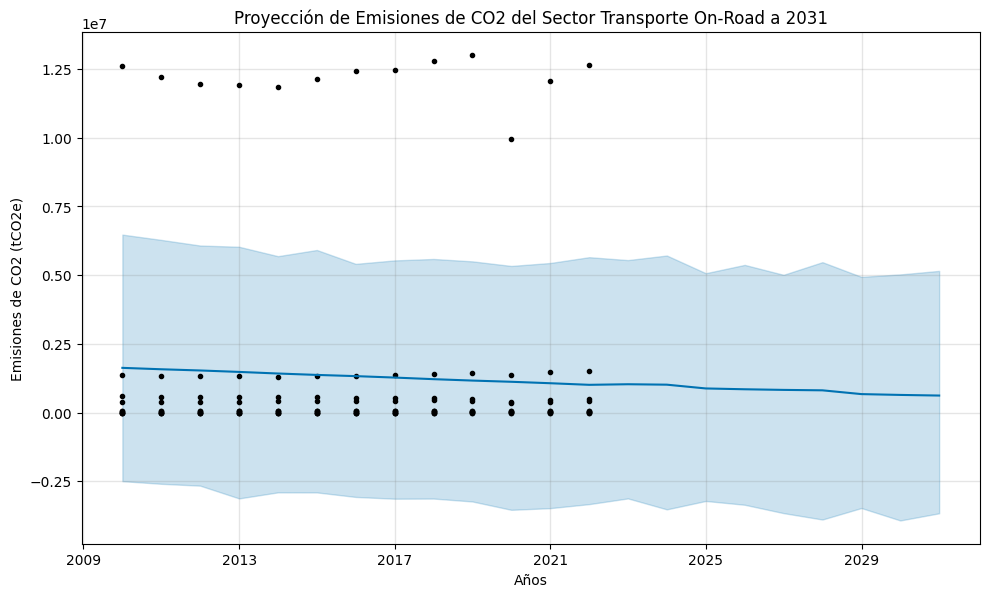

In [74]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Crear y entrenar el modelo Prophet
model = Prophet()
model.fit(df_on_road)

# Crear un dataframe con las fechas futuras para la predicción
future_dates = model.make_future_dataframe(periods=9, freq='YE')  # 9 años adicionales hasta 2031
forecast = model.predict(future_dates)

# Visualizar la predicción
fig = model.plot(forecast)
plt.xlabel('Años')
plt.ylabel('Emisiones de CO2 (tCO2e)')
plt.title('Proyección de Emisiones de CO2 del Sector Transporte On-Road a 2031')
plt.show()


11:23:56 - cmdstanpy - INFO - Chain [1] start processing
11:23:56 - cmdstanpy - INFO - Chain [1] done processing


           ds category_full          y
45 2010-01-01       On-Road  392316.69
47 2010-01-01       On-Road   66544.43
48 2010-01-01       On-Road   57329.01
49 2010-01-01       On-Road       0.00
50 2010-01-01       On-Road     403.26


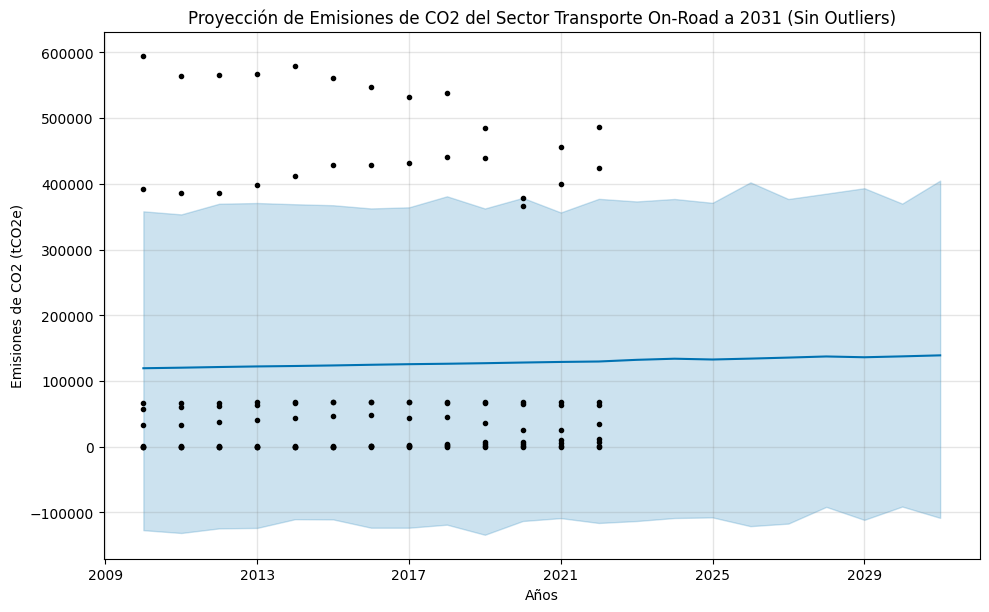

In [76]:
# Identificar outliers usando el rango intercuartil (IQR)
Q1 = df_on_road['y'].quantile(0.25)
Q3 = df_on_road['y'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar los outliers
df_on_road_clean = df_on_road[~((df_on_road['y'] < (Q1 - 1.5 * IQR)) | (df_on_road['y'] > (Q3 + 1.5 * IQR)))]

# Verificar el DataFrame limpio
print(df_on_road_clean.head())

# Reentrenar el modelo Prophet con los datos limpios
model = Prophet()
model.fit(df_on_road_clean)

# Crear un dataframe con las fechas futuras para la predicción
future_dates_clean = model.make_future_dataframe(periods=9, freq='YE')
forecast_clean = model.predict(future_dates_clean)

# Visualizar la nueva predicción
fig = model.plot(forecast_clean)
plt.xlabel('Años')
plt.ylabel('Emisiones de CO2 (tCO2e)')
plt.title('Proyección de Emisiones de CO2 del Sector Transporte On-Road a 2031 (Sin Outliers)')
plt.show()


In [80]:
import pandas as pd

# Cargar el archivo de Excel
file_path = 'NYC_CO2_Emissions_Inventory.xlsx'
df = pd.read_excel(file_path)

# Filtrar las filas del sector de transporte
df_transportation = df[df['sectors_sector'].str.contains('Transportation', case=False, na=False)]

# Seleccionar solo las columnas necesarias
df_transportation = df_transportation[['year', 'category_full', 'emission_tco2e']]
print(df_transportation.head())



    year      category_full  emission_tco2e
34  2010           Railways       758079.20
35  2010           Railways        13824.05
36  2010           Railways            0.00
37  2010  Marine Navigation        51541.69
38  2010  Marine Navigation            0.00


In [81]:
def data_lista(df, categoria, columna):
    df_filtrado = df[df['category_full'] == categoria]
    df_prophet = df_filtrado[['year', columna]].copy()
    df_prophet.rename(columns={'year': 'ds', columna: 'y'}, inplace=True)
    df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')
    
    return df_prophet

# Selección de la categoría y columna para la predicción
categoria = 'On-Road'  # Ajusta esto según tus necesidades
columna = 'emission_tco2e'

df_prophet = data_lista(df_transportation, categoria, columna)



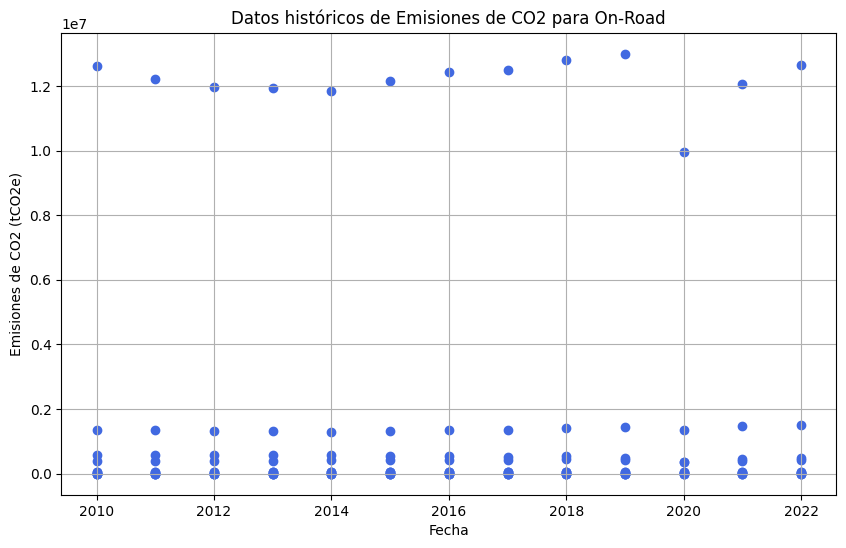

In [82]:
import matplotlib.pyplot as plt

def graficar_original(df_prophet, categoria):
    plt.figure(figsize=(10, 6))
    plt.scatter(df_prophet["ds"], df_prophet["y"], color='royalblue')
    plt.title(f"Datos históricos de Emisiones de CO2 para {categoria}")
    plt.xlabel("Fecha")
    plt.ylabel("Emisiones de CO2 (tCO2e)")
    plt.grid(True)
    plt.show()

graficar_original(df_prophet, categoria)


11:36:22 - cmdstanpy - INFO - Chain [1] start processing
11:36:22 - cmdstanpy - INFO - Chain [1] done processing


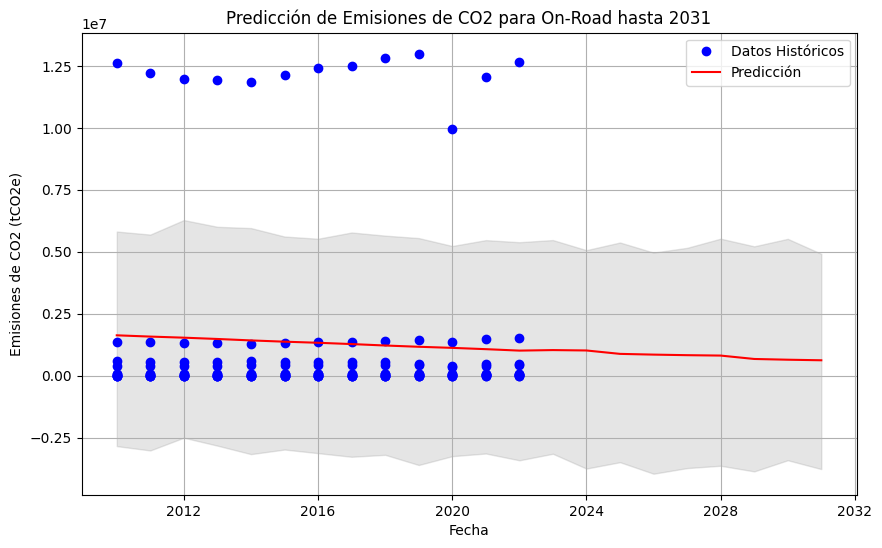

In [84]:
from prophet import Prophet

# Periodos para la predicción
periodos = 9  # Puede ajustar esto según sea necesario

def predecir_columna(df_prophet, periodos, categoria):
    model = Prophet(changepoint_prior_scale=0.05, seasonality_prior_scale=10.0, seasonality_mode='additive')
    model.add_seasonality(name='yearly', period=365.25, fourier_order=10)
    model.fit(df_prophet)
    future = model.make_future_dataframe(periods=periodos, freq='YE')
    forecast = model.predict(future)

    plt.figure(figsize=(10, 6))
    plt.plot(df_prophet["ds"], df_prophet["y"], 'bo', label='Datos Históricos')
    plt.plot(forecast['ds'], forecast['yhat'], 'r-', label='Predicción')
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2)
    plt.xlabel("Fecha")
    plt.ylabel("Emisiones de CO2 (tCO2e)")
    plt.title(f"Predicción de Emisiones de CO2 para {categoria} hasta 2031")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return model, forecast

model, forecast = predecir_columna(df_prophet, periodos, categoria)


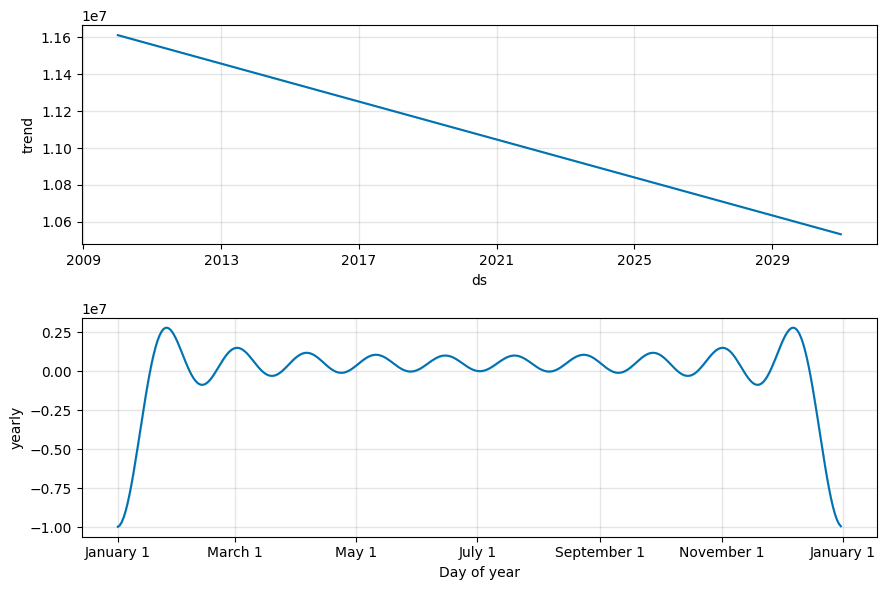

In [85]:
def evaluar_modelo(model, forecast):
    fig1 = model.plot_components(forecast)
    plt.show()

evaluar_modelo(model, forecast)


In [86]:
import pandas as pd

# Cargar el archivo de Excel
file_path = 'NYC_CO2_Emissions_Inventory.xlsx'
df = pd.read_excel(file_path)

# Filtrar las filas del sector de transporte
df_transportation = df[df['sectors_sector'].str.contains('Transportation', case=False, na=False)]

# Seleccionar solo las columnas necesarias
df_transportation = df_transportation[['year', 'category_full', 'emission_tco2e']]

# Preparar los datos para Prophet
df_transportation = df_transportation.rename(columns={'year': 'ds', 'emission_tco2e': 'y'})
df_transportation['ds'] = pd.to_datetime(df_transportation['ds'], format='%Y')

# Identificar los outliers usando el rango intercuartil (IQR)
Q1 = df_transportation['y'].quantile(0.25)
Q3 = df_transportation['y'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df_transportation[(df_transportation['y'] < lower_bound) | (df_transportation['y'] > upper_bound)]
df_clean = df_transportation[(df_transportation['y'] >= lower_bound) & (df_transportation['y'] <= upper_bound)]

# Mostrar los outliers
print("Outliers detectados:")
print(outliers)

# Mostrar el DataFrame limpio
print("Datos sin outliers:")
print(df_clean)


Outliers detectados:
            ds category_full            y
44  2010-01-01       On-Road  12619175.98
46  2010-01-01       On-Road   1353434.07
99  2011-01-01       On-Road  12202449.45
101 2011-01-01       On-Road   1348893.88
154 2012-01-01       On-Road  11972767.40
156 2012-01-01       On-Road   1324447.18
209 2013-01-01       On-Road  11931734.60
211 2013-01-01       On-Road   1329090.00
264 2014-01-01       On-Road  11844931.68
266 2014-01-01       On-Road   1291586.18
319 2015-01-01       On-Road  12157010.71
321 2015-01-01       On-Road   1322537.46
374 2016-01-01       On-Road  12437484.31
376 2016-01-01       On-Road   1345703.82
429 2017-01-01       On-Road  12484566.31
431 2017-01-01       On-Road   1362498.68
484 2018-01-01       On-Road  12805237.63
486 2018-01-01       On-Road   1417949.74
539 2019-01-01       On-Road  12997213.55
541 2019-01-01       On-Road   1448966.85
594 2020-01-01       On-Road   9961821.70
596 2020-01-01       On-Road   1352997.60
649 2021-01-0

11:53:14 - cmdstanpy - INFO - Chain [1] start processing
11:53:14 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\MegaTecnologia\OneDrive\Documentos\Data Science - Soy Henry\LABS-2\venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



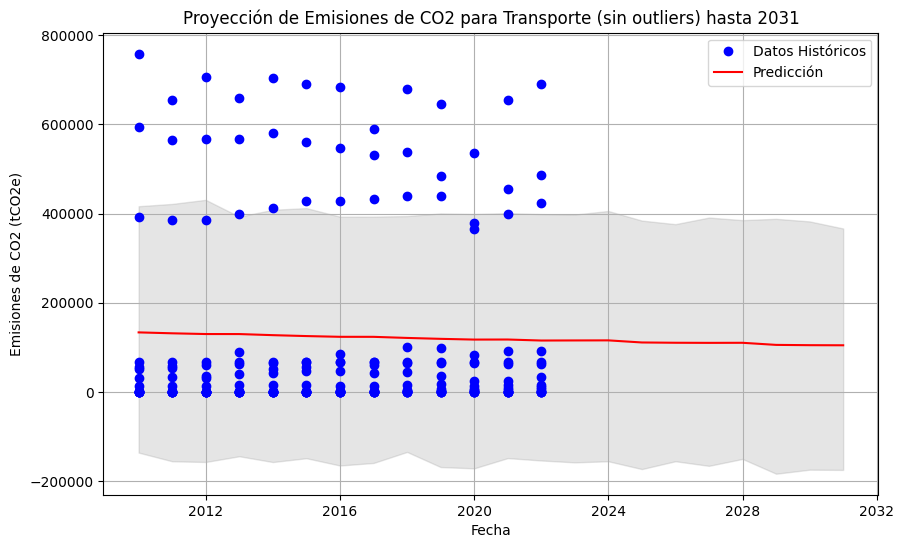

In [87]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Crear y entrenar el modelo Prophet con datos limpios
model = Prophet()
model.fit(df_clean)

# Crear un dataframe con las fechas futuras para la predicción
future_dates = model.make_future_dataframe(periods=9, freq='YE')
forecast = model.predict(future_dates)

# Visualizar la predicción
plt.figure(figsize=(10, 6))
plt.plot(df_clean["ds"], df_clean["y"], 'bo', label='Datos Históricos')
plt.plot(forecast['ds'], forecast['yhat'], 'r-', label='Predicción')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2)
plt.xlabel("Fecha")
plt.ylabel("Emisiones de CO2 (tCO2e)")
plt.title("Proyección de Emisiones de CO2 para Transporte (sin outliers) hasta 2031")
plt.legend()
plt.grid(True)
plt.show()
